In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

## **Step1. Load The Data**

In [3]:
df=pd.read_csv("Social Media Engagement Dataset.csv")
df

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,vpqni584supc,2025-01-10 07:55:51,Friday,Instagram,user_ysobum87,"Seoul, South Korea",ar,Comparing Toyota Camry to the competition. Bes...,"#Food, #BestValue","@IndustryExpert, @InfluencerName",...,41,220,22.08636,Toyota,Camry,CustomerFirst,Pre-Launch,-0.0299,0.0205,-6.0
11996,h8rvov0xym5z,2024-12-04 18:50:38,Wednesday,Reddit,user_2jzngfsp,"New York, USA",pt,My two days review of Apple AirPods Pro: Highl...,#TrendAlert,"@TrendSetter, @NewsOutlet",...,176,17346,0.20546,Apple,AirPods Pro,FallCollection,Launch,0.5936,-0.0928,-92.1
11997,14zrjm51ea3y,2024-10-24 19:11:24,Thursday,Facebook,user_0sidyfyh,"Lyon, France",ja,Just unboxed my new Dri-FIT from Nike. Best pu...,#Food,"@RetailSupport, @TechHelp",...,330,90913,0.05342,Nike,Dri-FIT,LocalTouchpoints,Post-Launch,0.0899,-0.1186,-96.8
11998,7bdmnv3rdj8n,2024-11-12 03:07:19,Tuesday,Reddit,user_njyhr041,"Manchester, UK",fr,Comparing Toyota Camry to the competition. Doe...,"#SpecialOffer, #Promo, #Fashion","@BrandSupport, @TechHelp",...,221,78790,0.04732,Toyota,Camry,CyberMonday,Post-Launch,-0.3666,-0.4527,15.9


# Step 1: **Understanding the Business Problem**

business_problem_summary = """
This dataset appears to represent social media engagement data from multiple platforms (Instagram, Twitter, Reddit, YouTube).
The context likely involves understanding how users engage with content posted by brands or users, with metrics like engagement_rate, comments_count, impressions, and user_sentiment. 
The key business problem revolves around identifying what factors drive higher engagement, brand buzz, and user sentiment.

Key questions this analysis aims to answer:
1. What variables are most strongly associated with high engagement rates?
2. Are there platform-specific differences in engagement patterns?
3. How do factors like hashtags, mentions, product names, or campaign phases influence user engagement?
4. What actionable insights can brands extract to maximize user engagement and positive sentiment?
"""




In [4]:
df.shape

(12000, 28)

# Step 2: **Data Understanding**

In [5]:
df.shape

(12000, 28)

In [6]:
df.columns

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [7]:
df.dtypes

post_id                     object
timestamp                   object
day_of_week                 object
platform                    object
user_id                     object
location                    object
language                    object
text_content                object
hashtags                    object
mentions                    object
keywords                    object
topic_category              object
sentiment_score            float64
sentiment_label             object
emotion_type                object
toxicity_score             float64
likes_count                  int64
shares_count                 int64
comments_count               int64
impressions                  int64
engagement_rate            float64
brand_name                  object
product_name                object
campaign_name               object
campaign_phase              object
user_past_sentiment_avg    float64
user_engagement_growth     float64
buzz_change_rate           float64
dtype: object

In [8]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [9]:
# Number of missing values per column
df.isnull().sum()

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

In [10]:
# Number of duplicate rows
df.duplicated().sum()


np.int64(0)

In [11]:
# Unique value counts for each column
df.nunique()

post_id                    12000
timestamp                  11997
day_of_week                    7
platform                       5
user_id                    12000
location                      33
language                      10
text_content               11997
hashtags                    4490
mentions                     225
keywords                    9342
topic_category                 6
sentiment_score             9038
sentiment_label                3
emotion_type                   5
toxicity_score              6987
likes_count                 4553
shares_count                1994
comments_count              1001
impressions                11279
engagement_rate             9363
brand_name                    10
product_name                  70
campaign_name                 23
campaign_phase                 3
user_past_sentiment_avg     9050
user_engagement_growth      6966
buzz_change_rate            1997
dtype: int64

# Step 3: **Data Exploration**

In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()


In [13]:
num_cols

['sentiment_score',
 'toxicity_score',
 'likes_count',
 'shares_count',
 'comments_count',
 'impressions',
 'engagement_rate',
 'user_past_sentiment_avg',
 'user_engagement_growth',
 'buzz_change_rate']

In [14]:
cat_cols

['post_id',
 'timestamp',
 'day_of_week',
 'platform',
 'user_id',
 'location',
 'language',
 'text_content',
 'hashtags',
 'mentions',
 'keywords',
 'topic_category',
 'sentiment_label',
 'emotion_type',
 'brand_name',
 'product_name',
 'campaign_name',
 'campaign_phase']

In [15]:
# Summary statistics for numerical variables
df.describe()

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.000553,0.503868,2490.72025,1007.167167,504.34575,49811.338500,0.278137,0.001472,0.000998,0.729692
std,0.583563,0.288198,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.576627,0.289940,57.787219
min,-0.999800,0.000000,0.00000,0.000000,0.00000,130.000000,0.001880,-0.999600,-0.499900,-99.900000
25%,-0.503200,0.251400,1236.00000,510.000000,253.00000,24716.500000,0.049100,-0.495975,-0.248400,-48.700000
50%,-0.006200,0.505950,2496.00000,1018.000000,503.00000,49674.000000,0.080605,0.001950,0.002800,0.900000
75%,0.513525,0.756200,3723.25000,1501.000000,755.00000,74815.000000,0.163123,0.501725,0.250700,50.100000
max,0.999900,0.999900,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,0.999400,0.499900,99.900000


In [16]:
# Splitting the dataset into numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

numerical,categorical

(Index(['sentiment_score', 'toxicity_score', 'likes_count', 'shares_count',
        'comments_count', 'impressions', 'engagement_rate',
        'user_past_sentiment_avg', 'user_engagement_growth',
        'buzz_change_rate'],
       dtype='object'),
 Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
        'location', 'language', 'text_content', 'hashtags', 'mentions',
        'keywords', 'topic_category', 'sentiment_label', 'emotion_type',
        'brand_name', 'product_name', 'campaign_name', 'campaign_phase'],
       dtype='object'))

In [17]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_score,12000.0,0.000553,0.583563,-0.99980,-0.503200,-0.006200,0.513525,0.99990
toxicity_score,12000.0,0.503868,0.288198,0.00000,0.251400,0.505950,0.756200,0.99990
likes_count,12000.0,2490.720250,1441.532530,0.00000,1236.000000,2496.000000,3723.250000,5000.00000
shares_count,12000.0,1007.167167,575.072282,0.00000,510.000000,1018.000000,1501.000000,2000.00000
comments_count,12000.0,504.345750,288.684160,0.00000,253.000000,503.000000,755.000000,1000.00000
impressions,12000.0,49811.338500,28930.289451,130.00000,24716.500000,49674.000000,74815.000000,99997.00000
engagement_rate,12000.0,0.278137,1.149206,0.00188,0.049100,0.080605,0.163123,32.21171
user_past_sentiment_avg,12000.0,0.001472,0.576627,-0.99960,-0.495975,0.001950,0.501725,0.99940
user_engagement_growth,12000.0,0.000998,0.289940,-0.49990,-0.248400,0.002800,0.250700,0.49990
buzz_change_rate,12000.0,0.729692,57.787219,-99.90000,-48.700000,0.900000,50.100000,99.90000


In [18]:
df[categorical].describe().T


,count,unique,top,freq
post_id,12000,12000,638tldv060me,1
timestamp,12000,11997,2024-07-29 19:40:44,2
day_of_week,12000,7,Wednesday,1771
platform,12000,5,YouTube,2436
user_id,12000,12000,user_04o7c7eq,1
location,12000,33,"Milan, Italy",403
language,12000,10,ja,1234
text_content,12000,11997,Just tried the Nest Hub from Google. Exceeded ...,2
hashtags,12000,4490,#NewRelease,153
mentions,8059,225,@RetailSupport,286


In [19]:
# For Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"🔤 Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print("\n" + "-"*50 + "\n")

# For Count Columns (which are numeric but represent discrete counts)
# Assuming columns like 'likes', 'comments', 'shares' are count columns:
count_cols = ['likes_count', 'comments_count', 'shares_count']  # Update based on your dataset

for col in count_cols:
    print(f"🔢 Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print("\n" + "-"*50 + "\n")


🔤 Column: post_id
Unique Values: ['kcqbs6hxybia' 'vkmervg4ioos' 'memhx4o1x6yu' ... '14zrjm51ea3y'
 '7bdmnv3rdj8n' '28cbflmapxbj']
Value Counts:
post_id
638tldv060me    1
re51xr0m9z53    1
lkvh494g6pmx    1
hh1qevarqf3p    1
dgylkpacjmsd    1
               ..
c9dkiomowakt    1
bhyo6piijqt9    1
memhx4o1x6yu    1
vkmervg4ioos    1
kcqbs6hxybia    1
Name: count, Length: 12000, dtype: int64

--------------------------------------------------

🔤 Column: timestamp
Unique Values: ['2024-12-09 11:26:15' '2024-07-28 19:59:26' '2024-11-23 14:00:12' ...
 '2024-10-24 19:11:24' '2024-11-12 03:07:19' '2024-05-15 20:07:23']
Value Counts:
timestamp
2024-07-29 19:40:44    2
2025-04-21 08:11:51    2
2024-08-25 19:23:09    2
2024-12-27 12:51:45    1
2025-03-01 00:39:15    1
                      ..
2024-12-22 03:21:05    1
2024-11-29 10:01:53    1
2024-08-31 06:12:58    1
2025-04-05 23:46:20    1
2024-05-26 13:04:10    1
Name: count, Length: 11997, dtype: int64

-----------------------------------------

## **Plots**


## **Univariate Analysis**

Summary Statistics for likes_count:
count    12000.00000
mean      2490.72025
std       1441.53253
min          0.00000
25%       1236.00000
50%       2496.00000
75%       3723.25000
max       5000.00000
Name: likes_count, dtype: float64
Skewness: 0.008637267032749899
Kurtosis: -1.1976003486203923


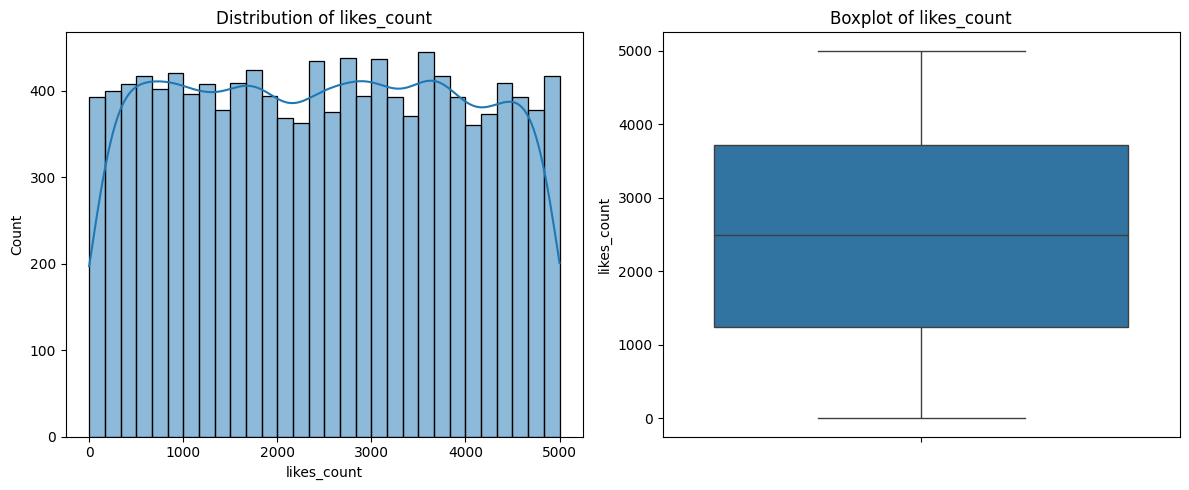

In [20]:
col = 'likes_count'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Summary Statistics for sentiment_score:
count    12000.000000
mean         0.000553
std          0.583563
min         -0.999800
25%         -0.503200
50%         -0.006200
75%          0.513525
max          0.999900
Name: sentiment_score, dtype: float64
Skewness: 0.003397719654378318
Kurtosis: -1.2262432256593376


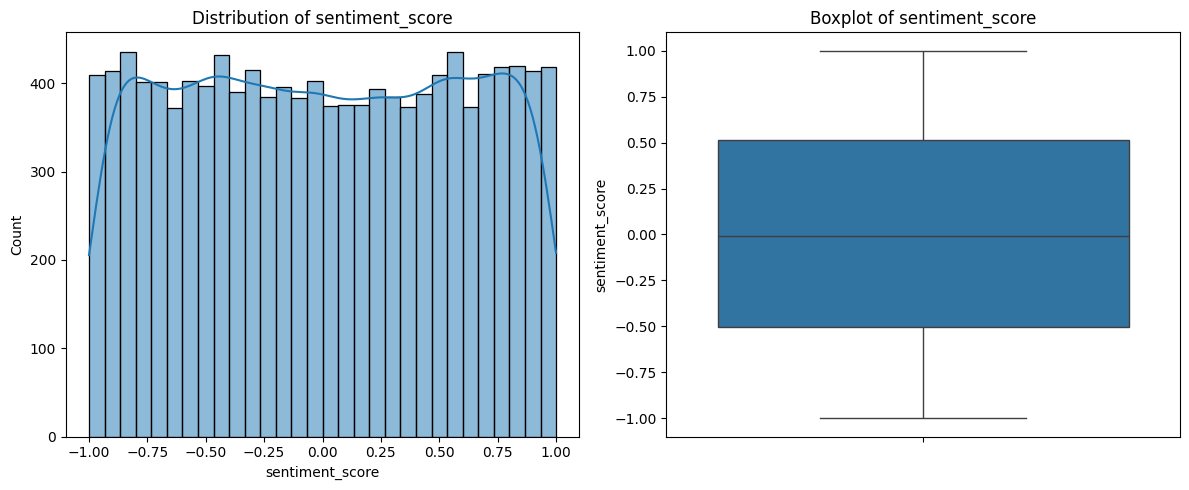

In [21]:
col = 'sentiment_score'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for toxicity_score:
count    12000.000000
mean         0.503868
std          0.288198
min          0.000000
25%          0.251400
50%          0.505950
75%          0.756200
max          0.999900
Name: toxicity_score, dtype: float64
Skewness: -0.010373036210825677
Kurtosis: -1.2178274897689703


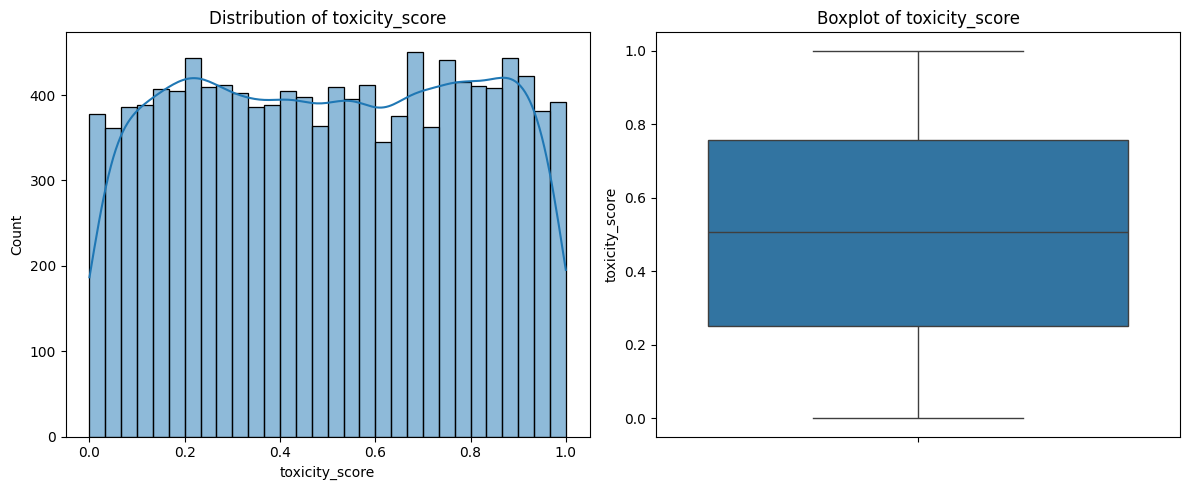

In [22]:
col = 'toxicity_score'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for shares_count:
count    12000.000000
mean      1007.167167
std        575.072282
min          0.000000
25%        510.000000
50%       1018.000000
75%       1501.000000
max       2000.000000
Name: shares_count, dtype: float64
Skewness: -0.013610194735777613
Kurtosis: -1.191612978542935


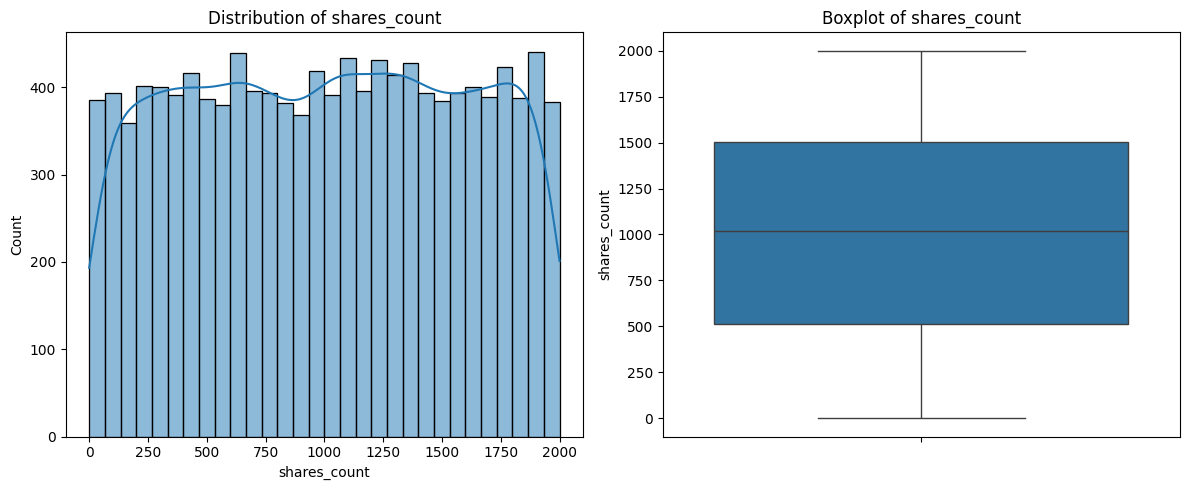

In [23]:
col = 'shares_count'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for comments_count:
count    12000.00000
mean       504.34575
std        288.68416
min          0.00000
25%        253.00000
50%        503.00000
75%        755.00000
max       1000.00000
Name: comments_count, dtype: float64
Skewness: -0.015403653234583198
Kurtosis: -1.2109961623592058


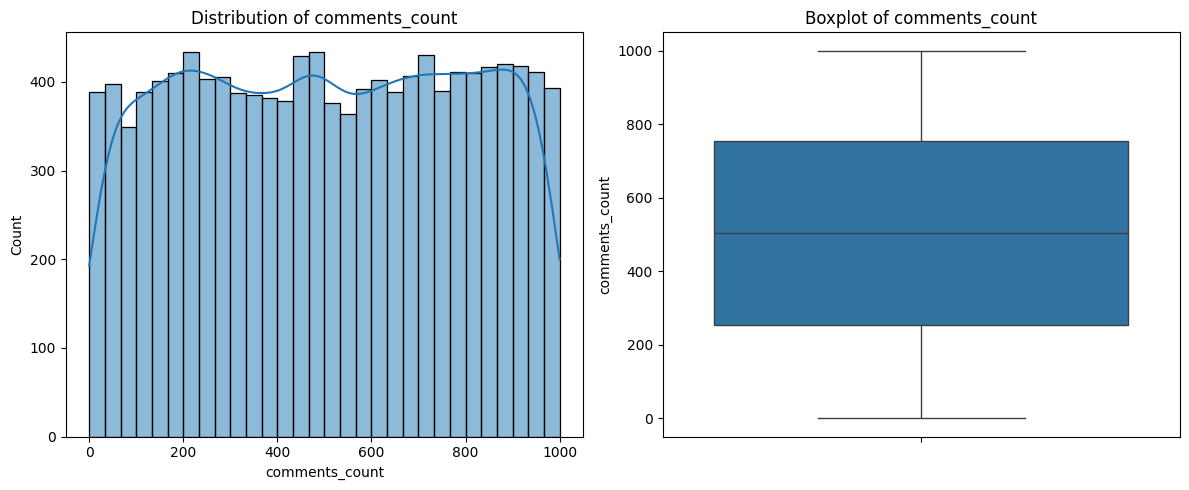

In [24]:
col = 'comments_count'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for impressions:
count    12000.000000
mean     49811.338500
std      28930.289451
min        130.000000
25%      24716.500000
50%      49674.000000
75%      74815.000000
max      99997.000000
Name: impressions, dtype: float64
Skewness: 0.006081263092919345
Kurtosis: -1.1982995378039092


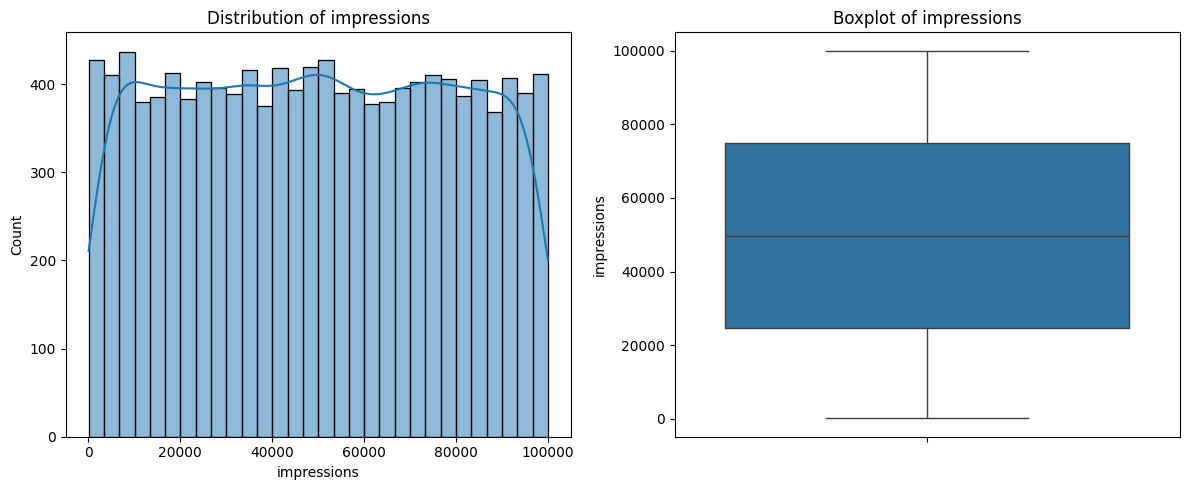

In [25]:
col = 'impressions'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for engagement_rate:
count    12000.000000
mean         0.278137
std          1.149206
min          0.001880
25%          0.049100
50%          0.080605
75%          0.163123
max         32.211710
Name: engagement_rate, dtype: float64
Skewness: 13.957061631780022
Kurtosis: 259.35973124224813


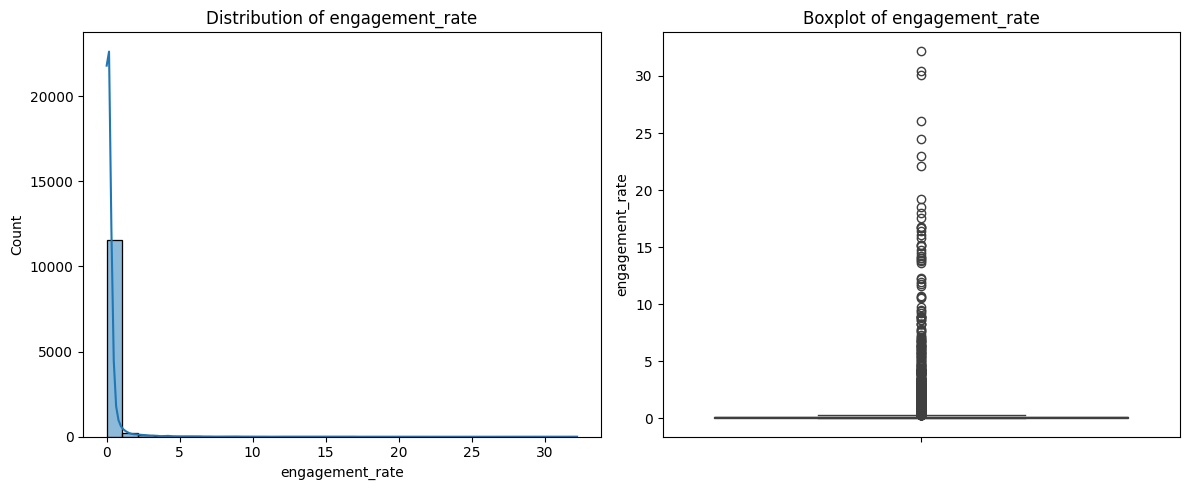

In [26]:
col = 'engagement_rate'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for user_past_sentiment_avg:
count    12000.000000
mean         0.001472
std          0.576627
min         -0.999600
25%         -0.495975
50%          0.001950
75%          0.501725
max          0.999400
Name: user_past_sentiment_avg, dtype: float64
Skewness: -0.011580682752888096
Kurtosis: -1.2014593732295757


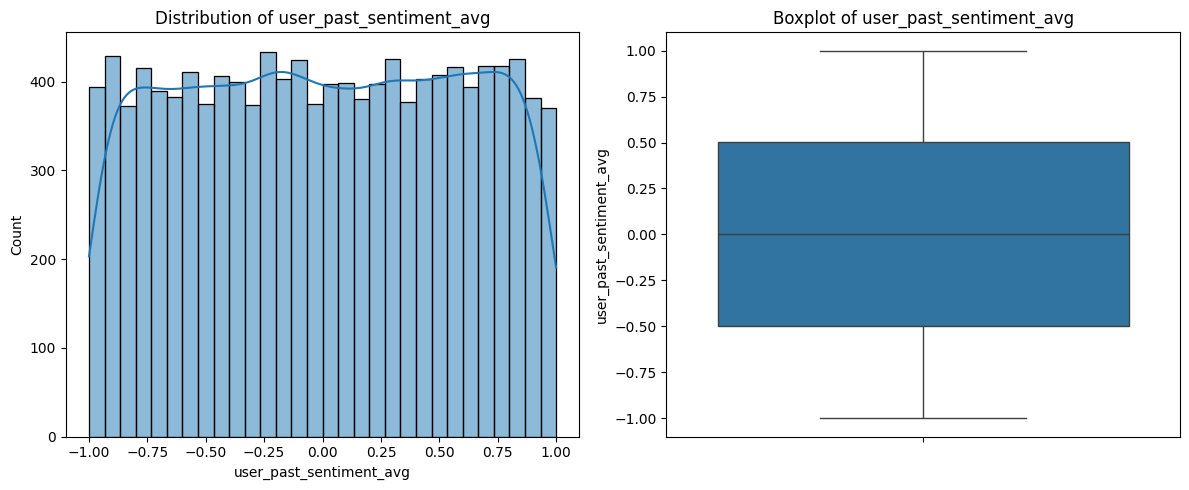

In [27]:
col = 'user_past_sentiment_avg'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for user_engagement_growth:
count    12000.000000
mean         0.000998
std          0.289940
min         -0.499900
25%         -0.248400
50%          0.002800
75%          0.250700
max          0.499900
Name: user_engagement_growth, dtype: float64
Skewness: -0.009275156083799398
Kurtosis: -1.2052515477706083


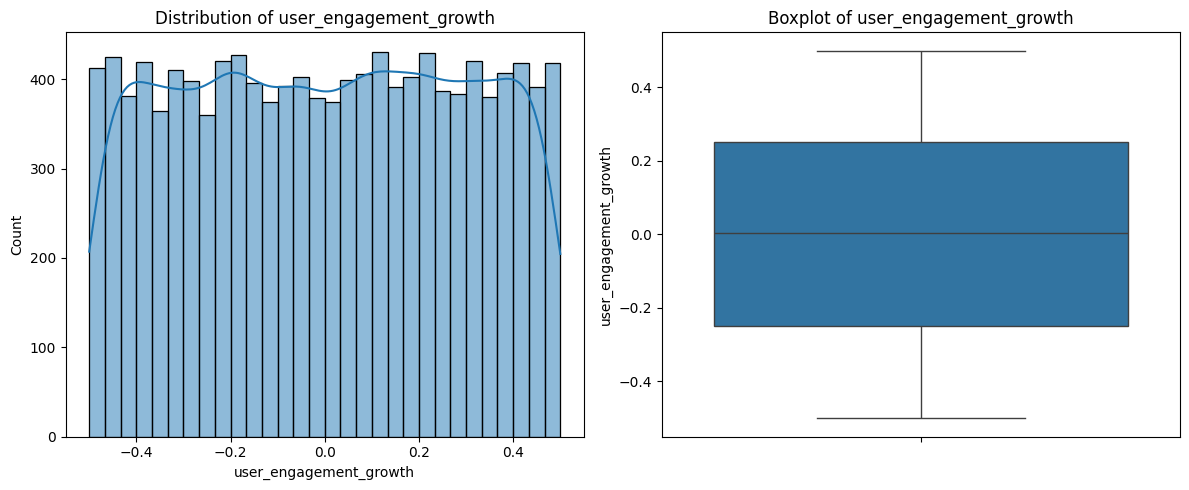

In [28]:
col = 'user_engagement_growth'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Summary Statistics for buzz_change_rate:
count    12000.000000
mean         0.729692
std         57.787219
min        -99.900000
25%        -48.700000
50%          0.900000
75%         50.100000
max         99.900000
Name: buzz_change_rate, dtype: float64
Skewness: -0.013984065475638466
Kurtosis: -1.1934126858540377


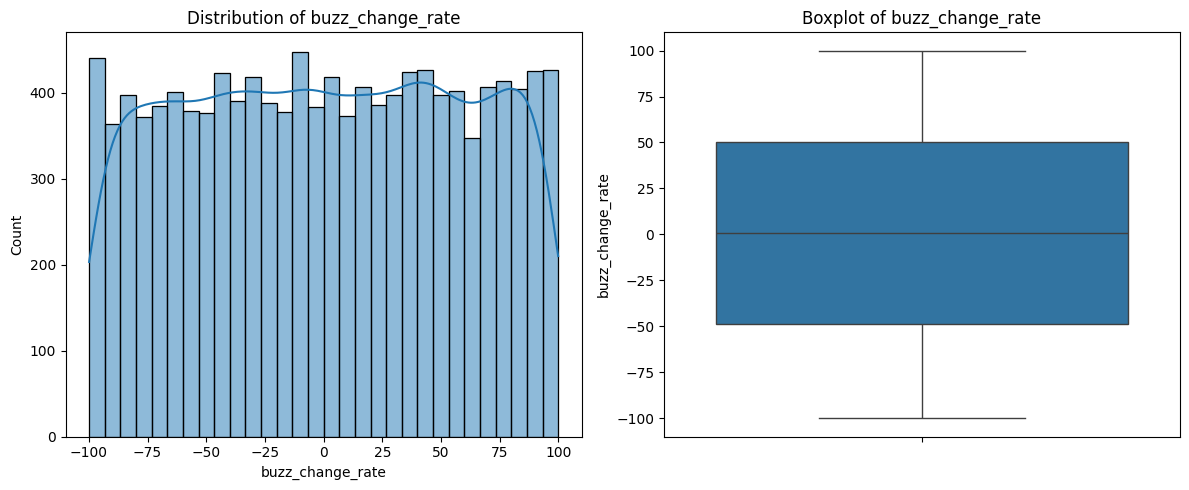

In [29]:
col = 'buzz_change_rate'
print(f"Summary Statistics for {col}:")
print(df[col].describe())
print(f"Skewness: {df[col].skew()}")
print(f"Kurtosis: {df[col].kurt()}")

plt.figure(figsize=(12,5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

🔤 Column: post_id
Value Counts:
post_id
638tldv060me    1
re51xr0m9z53    1
lkvh494g6pmx    1
hh1qevarqf3p    1
dgylkpacjmsd    1
               ..
c9dkiomowakt    1
bhyo6piijqt9    1
memhx4o1x6yu    1
vkmervg4ioos    1
kcqbs6hxybia    1
Name: count, Length: 12000, dtype: int64
Unique Values: ['kcqbs6hxybia' 'vkmervg4ioos' 'memhx4o1x6yu' ... '14zrjm51ea3y'
 '7bdmnv3rdj8n' '28cbflmapxbj']
--------------------------------------------------


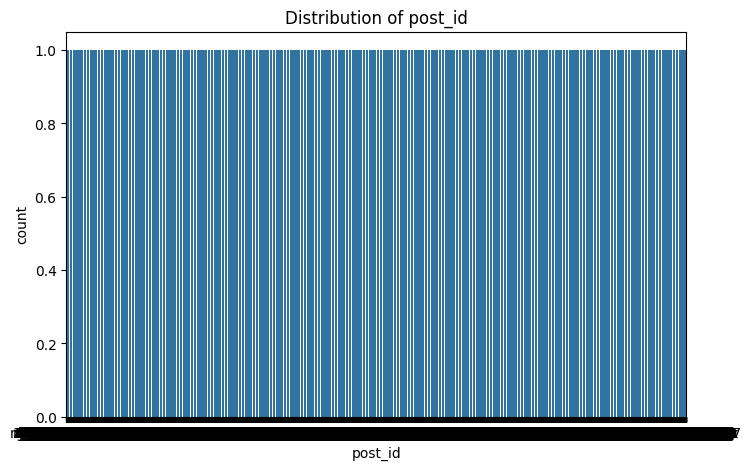

🔤 Column: timestamp
Value Counts:
timestamp
2024-07-29 19:40:44    2
2025-04-21 08:11:51    2
2024-08-25 19:23:09    2
2024-12-27 12:51:45    1
2025-03-01 00:39:15    1
                      ..
2024-12-22 03:21:05    1
2024-11-29 10:01:53    1
2024-08-31 06:12:58    1
2025-04-05 23:46:20    1
2024-05-26 13:04:10    1
Name: count, Length: 11997, dtype: int64
Unique Values: ['2024-12-09 11:26:15' '2024-07-28 19:59:26' '2024-11-23 14:00:12' ...
 '2024-10-24 19:11:24' '2024-11-12 03:07:19' '2024-05-15 20:07:23']
--------------------------------------------------


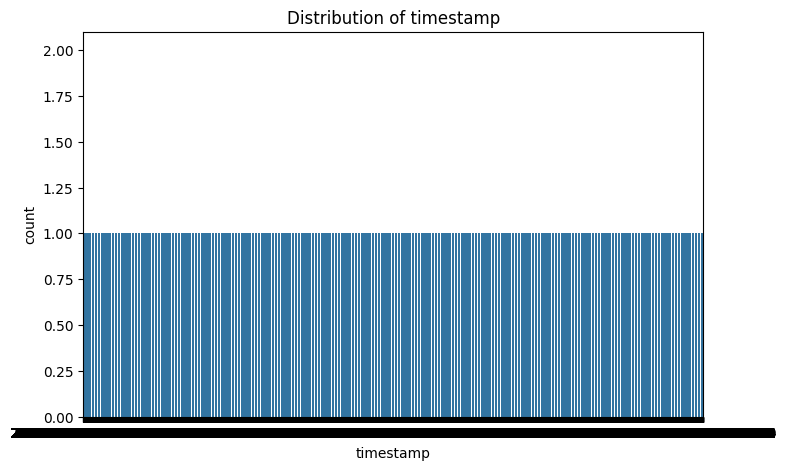

🔤 Column: day_of_week
Value Counts:
day_of_week
Wednesday    1771
Friday       1723
Monday       1720
Thursday     1718
Sunday       1716
Tuesday      1677
Saturday     1675
Name: count, dtype: int64
Unique Values: ['Monday' 'Sunday' 'Saturday' 'Thursday' 'Wednesday' 'Friday' 'Tuesday']
--------------------------------------------------


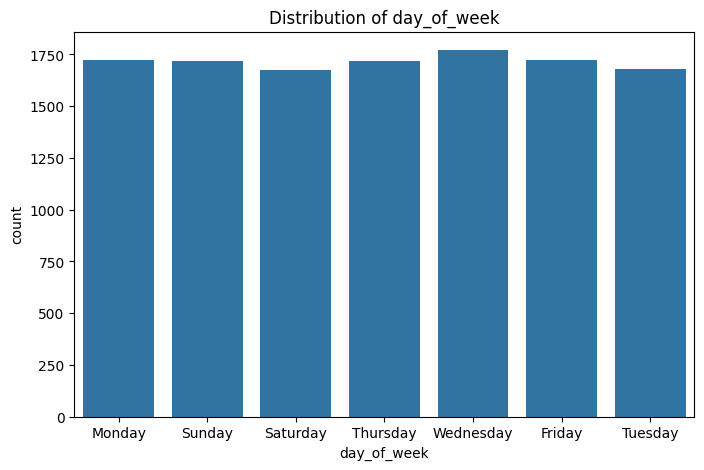

🔤 Column: platform
Value Counts:
platform
YouTube      2436
Facebook     2431
Twitter      2406
Reddit       2372
Instagram    2355
Name: count, dtype: int64
Unique Values: ['Instagram' 'Twitter' 'Reddit' 'YouTube' 'Facebook']
--------------------------------------------------


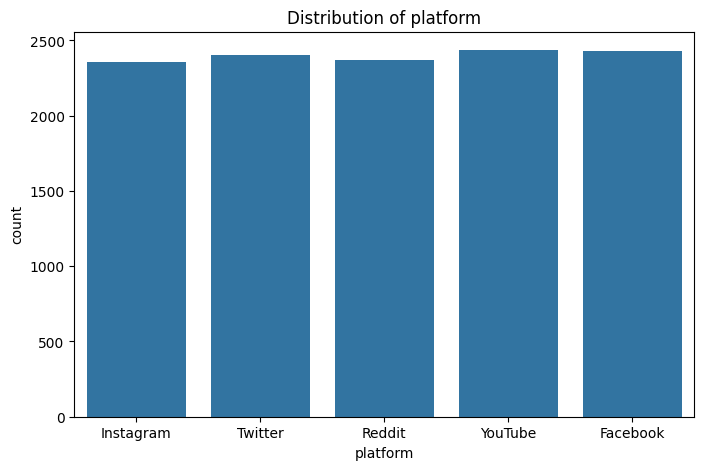

🔤 Column: user_id
Value Counts:
user_id
user_04o7c7eq    1
user_hm05dgne    1
user_25x8t5lc    1
user_mgnkwz7c    1
user_0osqp2dw    1
                ..
user_l1vpox2k    1
user_4mxuq0ax    1
user_7rrev126    1
user_ucryct98    1
user_52nwb0a6    1
Name: count, Length: 12000, dtype: int64
Unique Values: ['user_52nwb0a6' 'user_ucryct98' 'user_7rrev126' ... 'user_0sidyfyh'
 'user_njyhr041' 'user_gbxy87di']
--------------------------------------------------


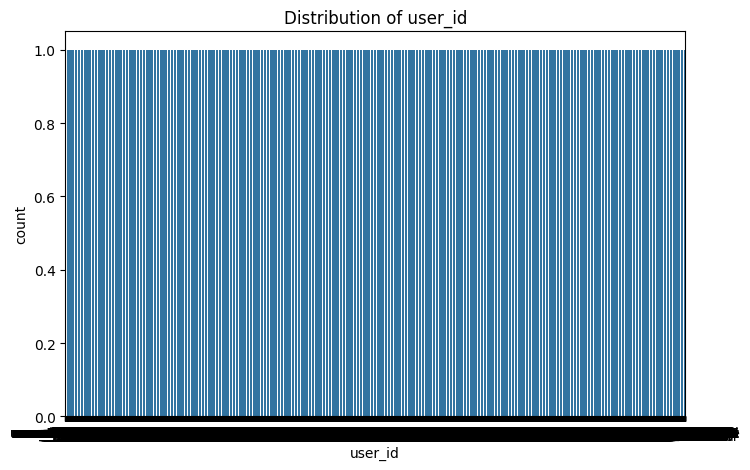

🔤 Column: location
Value Counts:
location
Milan, Italy                  403
Mexico City, Mexico           399
Dubai, UAE                    384
São Paulo, Brazil             383
Shanghai, China               383
Beijing, China                382
Barcelona, Spain              380
Munich, Germany               379
Mumbai, India                 379
New York, USA                 377
Los Angeles, USA              374
Johannesburg, South Africa    373
Melbourne, Australia          372
London, UK                    370
Berlin, Germany               369
Toronto, Canada               362
Seoul, South Korea            362
Vancouver, Canada             362
Houston, USA                  359
Paris, France                 358
Manchester, UK                358
Delhi, India                  355
Rio de Janeiro, Brazil        352
Sydney, Australia             351
Chicago, USA                  350
Rome, Italy                   349
Tokyo, Japan                  348
Osaka, Japan                  347
Lagos,

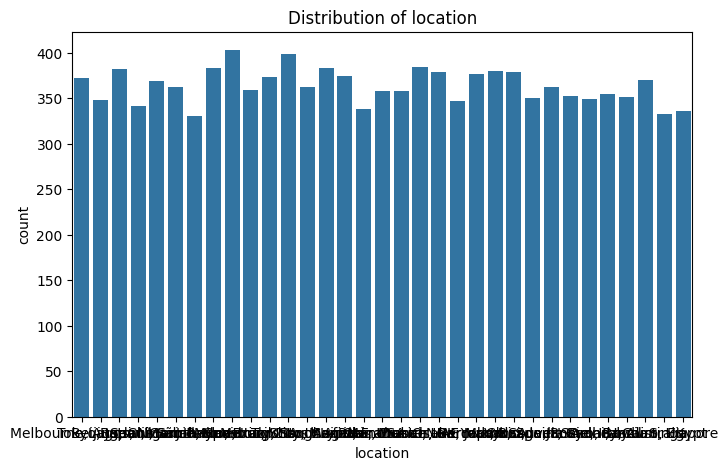

🔤 Column: language
Value Counts:
language
ja    1234
ru    1217
es    1214
ar    1211
zh    1207
fr    1197
en    1197
de    1195
hi    1181
pt    1147
Name: count, dtype: int64
Unique Values: ['pt' 'ru' 'en' 'hi' 'ja' 'es' 'de' 'fr' 'ar' 'zh']
--------------------------------------------------


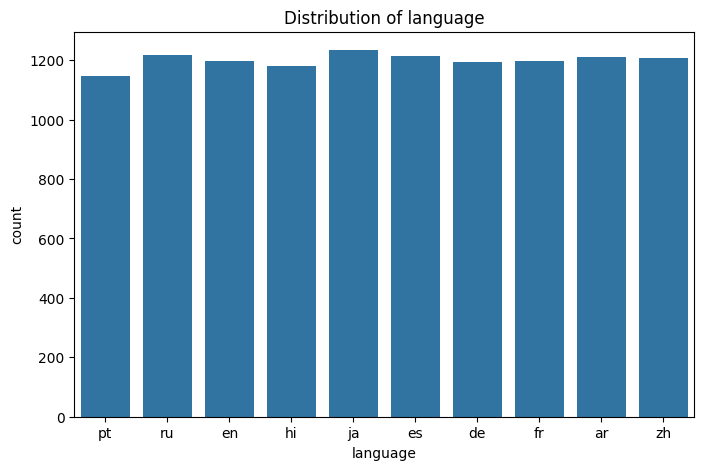

🔤 Column: text_content
Value Counts:
text_content
Just tried the Nest Hub from Google. Exceeded my expectations. #Trending Really interested in hearing your thoughts!                              2
Loving it with my new Pepsi Zero Sugar from Pepsi! Exceeded my expectations. #Quality Curious about your experience too.                          2
Just tried the Pepsi Zero Sugar from Pepsi. Wouldn't recommend. #Premium Curious about your experience too.                                       2
My six months review of Nike Air Jordan: Not bad. #Innovation Would love to get your feedback!                                                    1
Has anyone else experienced connectivity issues with Apple's MacBook Pro? Worth every penny. @BrandCEO, @CustomerService #NewRelease, #Reviews    1
                                                                                                                                                 ..
Comparing Apple Vision Pro to the competition. Exceeded my exp

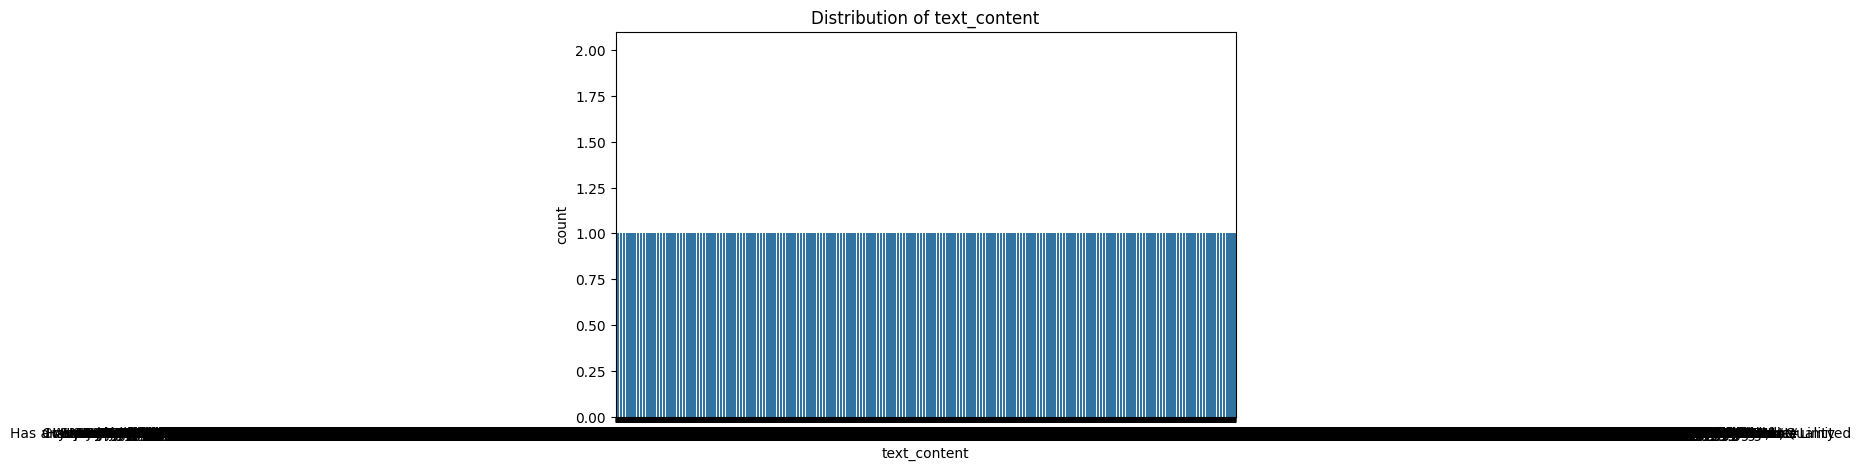

🔤 Column: hashtags
Value Counts:
hashtags
#NewRelease                           153
#Fitness                              149
#Food                                 148
#Lifestyle                            148
#Travel                               148
                                     ... 
#MustHave, #Health, #Deal               1
#MustHave, #Limited, #SpecialOffer      1
#Discount, #Reviews, #TrendAlert        1
#Health, #Reviews, #Premium             1
#Trending, #Discount, #Tech             1
Name: count, Length: 4490, dtype: int64
Unique Values: ['#Food' '#MustHave, #Food' '#Promo, #Food, #Trending' ...
 '#Quality, #Promo, #Food' '#Quality, #BestValue, #Eco'
 '#SpecialOffer, #Promo, #Fashion']
--------------------------------------------------


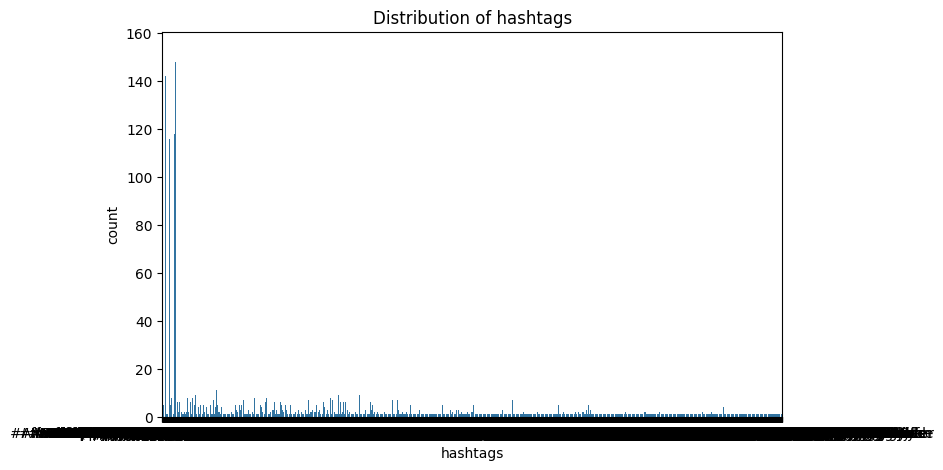

🔤 Column: mentions
Value Counts:
mentions
@RetailSupport                        286
@BrandCEO                             285
@InfluencerName                       284
@CompetitorBrand                      281
@IndustryExpert                       277
                                     ... 
@BrandCEO, @ReviewSite                 12
@MarketingTeam, @StyleGuide            11
@CustomerService, @RetailSupport       11
@RetailSupport, @CustomerService        9
@CompetitorBrand, @CustomerService      8
Name: count, Length: 225, dtype: int64
Unique Values: [nan '@CustomerService, @BrandCEO' '@StyleGuide, @BrandSupport'
 '@BrandSupport, @InfluencerName' '@MarketingTeam, @InfluencerName'
 '@TrendSetter' '@BrandSupport' '@MarketingTeam, @CelebrityName'
 '@CelebrityName, @BrandSupport' '@CustomerService'
 '@CompetitorBrand, @RetailSupport' '@ProductTeam, @RetailSupport'
 '@BrandSupport, @NewsOutlet' '@CelebrityName, @RetailSupport'
 '@StyleGuide, @MarketingTeam' '@BrandCEO, @CustomerService'
 '

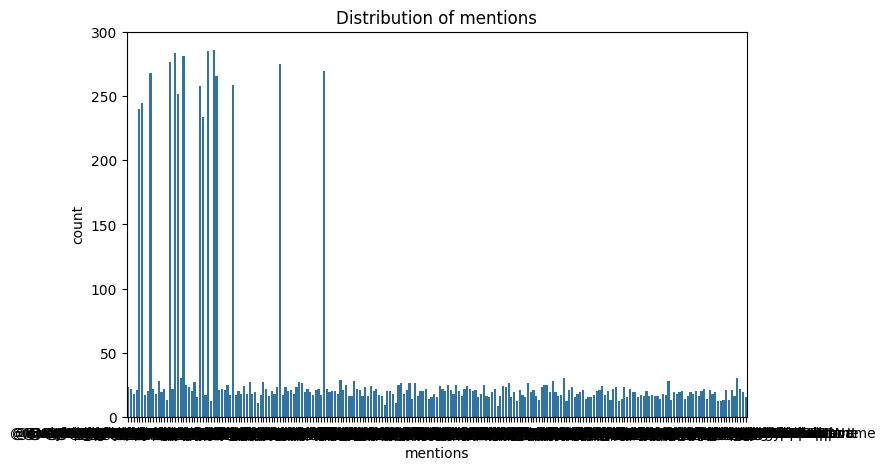

🔤 Column: keywords
Value Counts:
keywords
stylish, reliable                        10
design, fast                              8
design, poor                              8
fast, quality                             8
feature, excellent                        8
                                         ..
innovation, quality, cheap, stylish       1
disappointing, excellent, cheap           1
efficient, innovation, performance        1
improved, unique, premium, durable        1
fast, outdated, luxury, disappointing     1
Name: count, Length: 9342, dtype: int64
Unique Values: ['price, unique, traditional, efficient' 'delivery, slow'
 'reliable, budget, durable, experience' ... 'excellent, upgraded, luxury'
 'price, stylish, sustainable' 'service, sustainable, experience']
--------------------------------------------------


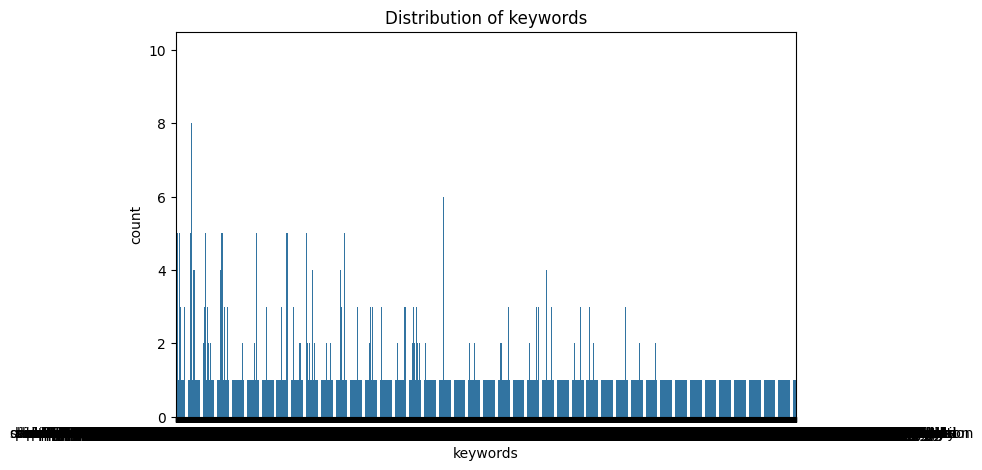

🔤 Column: topic_category
Value Counts:
topic_category
Pricing      2046
Marketing    2043
Delivery     2036
Returns      1991
Support      1947
Product      1937
Name: count, dtype: int64
Unique Values: ['Pricing' 'Delivery' 'Product' 'Support' 'Returns' 'Marketing']
--------------------------------------------------


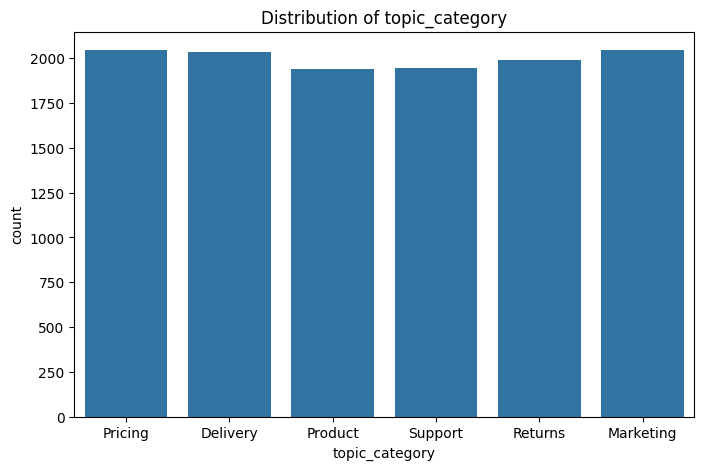

🔤 Column: sentiment_label
Value Counts:
sentiment_label
Negative    4854
Positive    4839
Neutral     2307
Name: count, dtype: int64
Unique Values: ['Positive' 'Negative' 'Neutral']
--------------------------------------------------


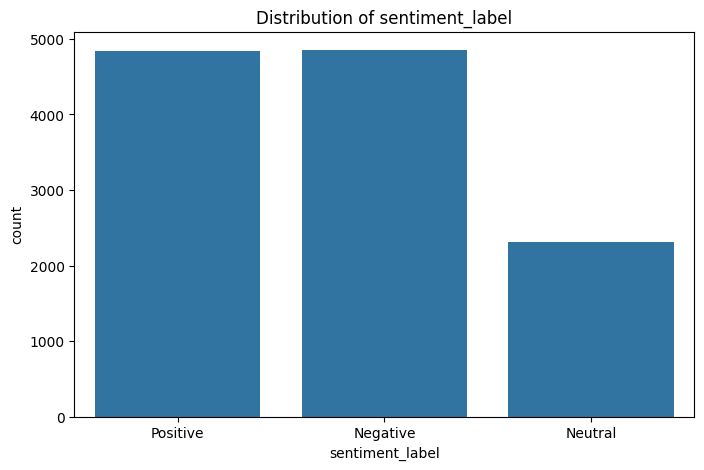

🔤 Column: emotion_type
Value Counts:
emotion_type
Sad         2504
Excited     2436
Confused    2393
Happy       2350
Angry       2317
Name: count, dtype: int64
Unique Values: ['Confused' 'Angry' 'Sad' 'Happy' 'Excited']
--------------------------------------------------


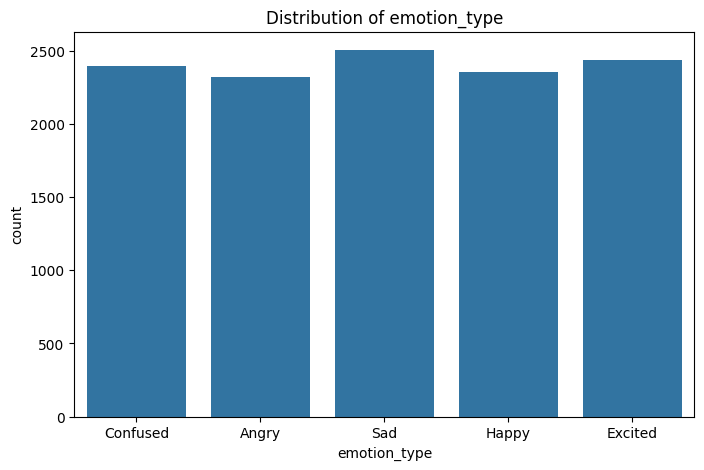

🔤 Column: brand_name
Value Counts:
brand_name
Microsoft    1239
Adidas       1229
Nike         1219
Google       1216
Samsung      1216
Pepsi        1199
Apple        1192
Toyota       1174
Coca-Cola    1173
Amazon       1143
Name: count, dtype: int64
Unique Values: ['Google' 'Microsoft' 'Nike' 'Pepsi' 'Toyota' 'Coca-Cola' 'Amazon'
 'Samsung' 'Adidas' 'Apple']
--------------------------------------------------


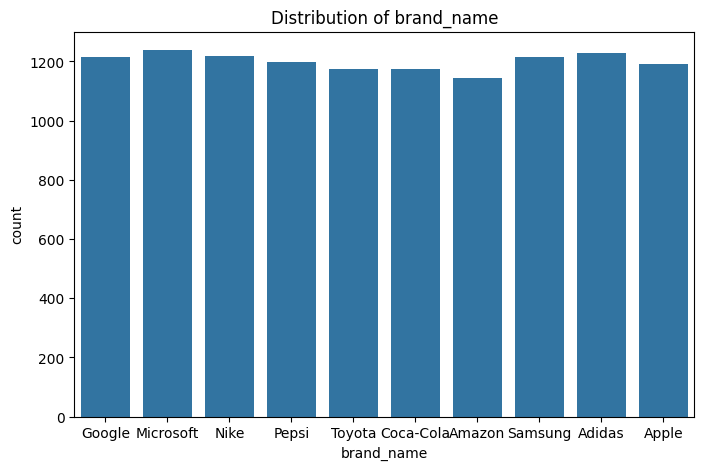

🔤 Column: product_name
Value Counts:
product_name
Coca-Cola Vanilla    226
Surface Pro          224
Pepsi Max            216
Surface Duo          215
Pepsi Zero Sugar     214
                    ... 
iMac                 139
iPhone 15            135
MacBook Pro          135
Prius                133
FlyKnit              129
Name: count, Length: 70, dtype: int64
Unique Values: ['Chromebook' 'Surface Laptop' 'Epic React' 'Diet Pepsi' 'Corolla' 'React'
 'Pepsi Wild Cherry' 'Coke Zero' 'Pixel Watch' 'Halo Band' 'Pixel Buds'
 'Crystal Pepsi' 'Galaxy S25' 'Surface Duo' 'Xbox Series X'
 'Coca-Cola Vanilla' 'Pepsi Max' 'Highlander' 'Predator' 'RAV4'
 'Xbox Elite Controller' 'Coca-Cola Cherry' 'MacBook Pro' 'iMac'
 'Ring Camera' 'Nest Hub' 'Sienna' 'Dri-FIT' 'FlyKnit' 'Galaxy Z Fold'
 'Camry' 'Yeezy' 'Pepsi Lime' 'Echo Dot' 'Ultraboost' 'Fire Tablet'
 'Samba' 'Apple Watch' 'Fanta' 'Galaxy Buds' 'NMD' 'Prius' 'Pixel Tablet'
 'iPad Air' 'Nest Thermostat' 'AirPods Pro' 'Air Jordan' 'Tundra'
 'Stan 

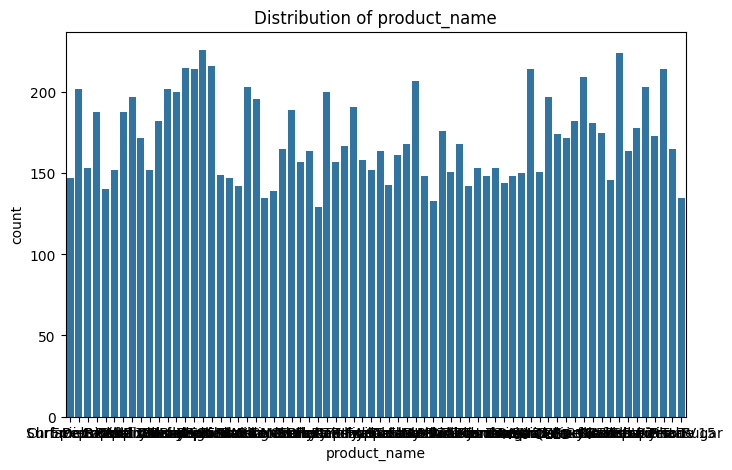

🔤 Column: campaign_name
Value Counts:
campaign_name
CyberMonday              573
LocalTouchpoints         567
InnovationX              560
BackToSchool             548
LoyaltyRewards           546
LaunchWave               546
WinterWonders            535
SummerSale               529
ValentinesDeals          520
HolidaySpecial           518
GlobalCampaign           514
ReferralBonus            512
EarthDay                 511
PowerRelease             511
SummerDreams             511
SpringBlast2025          510
CustomerFirst            508
NewYearNewYou            503
BlackFriday              501
FallCollection           500
SustainableFuture        499
NextGeneration           494
DigitalTransformation    484
Name: count, dtype: int64
Unique Values: ['BlackFriday' 'PowerRelease' 'LaunchWave' 'LocalTouchpoints'
 'CyberMonday' 'GlobalCampaign' 'CustomerFirst' 'SpringBlast2025'
 'HolidaySpecial' 'ValentinesDeals' 'InnovationX' 'WinterWonders'
 'NewYearNewYou' 'SummerDreams' 'SustainableFu

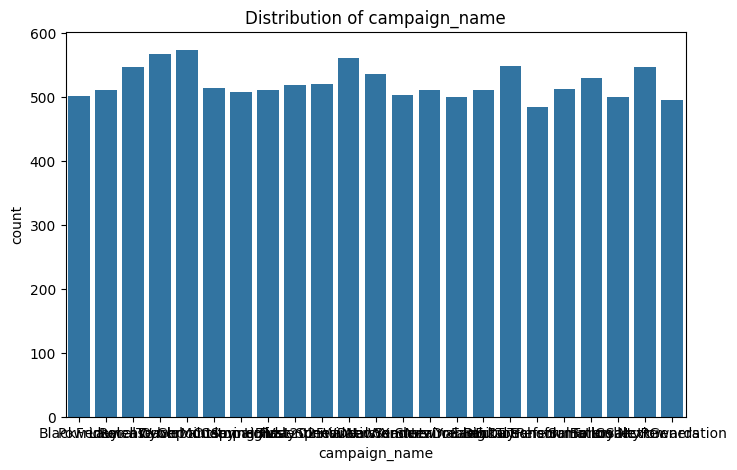

🔤 Column: campaign_phase
Value Counts:
campaign_phase
Pre-Launch     4006
Launch         4004
Post-Launch    3990
Name: count, dtype: int64
Unique Values: ['Launch' 'Post-Launch' 'Pre-Launch']
--------------------------------------------------


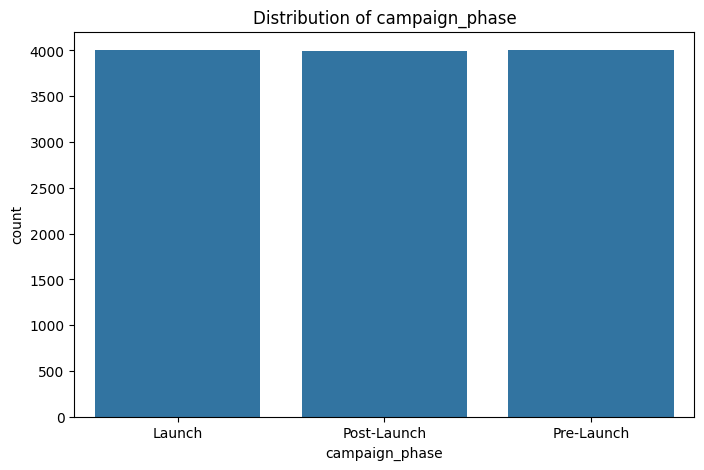

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"🔤 Column: {col}")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print(f"Unique Values: {df[col].unique()}")
    print("-" * 50)
    
    # Bar Plot
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


---
## **Bivariate Analysis**
---

This step involves analyzing relationships between two variables (numerical vs numerical, categorical vs numerical, categorical vs categorical).

**Numerical vs Numerical: Correlations and scatter plots**

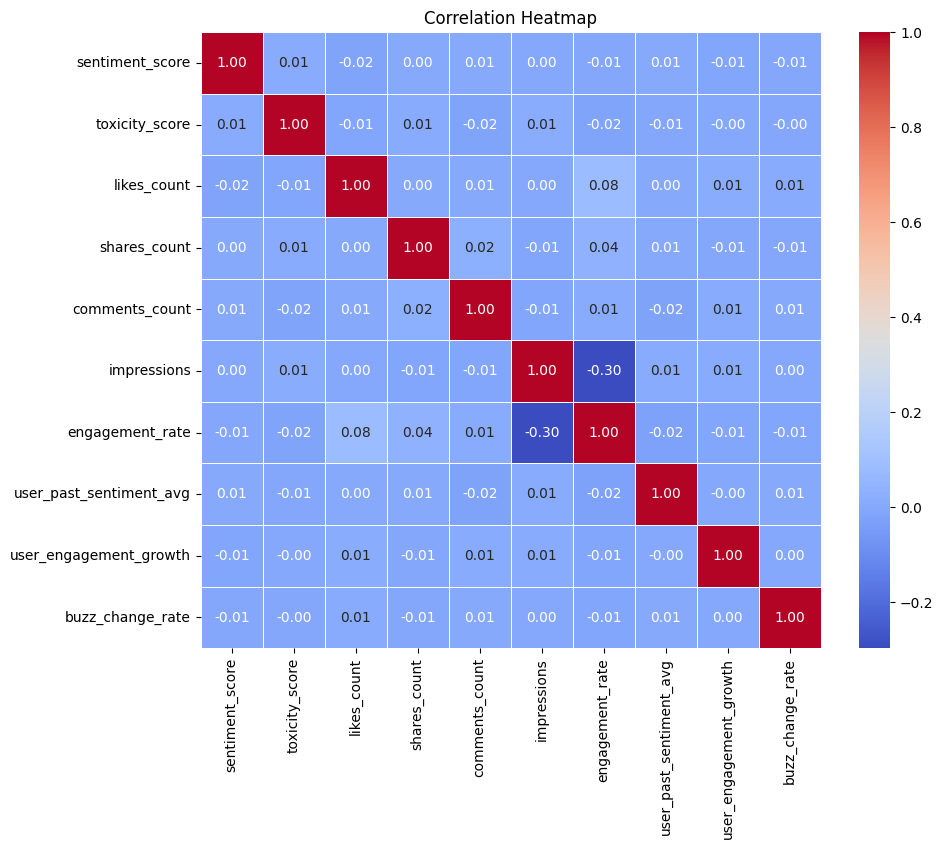

In [31]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## **Categorical vs Numerical: Boxplots and Violin plots**

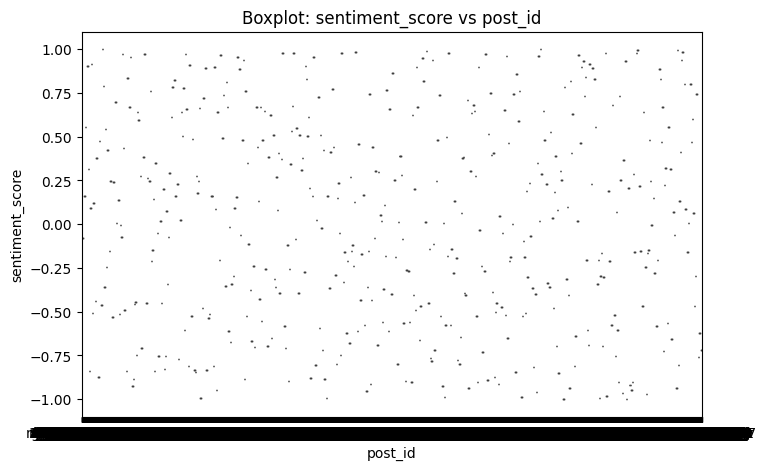

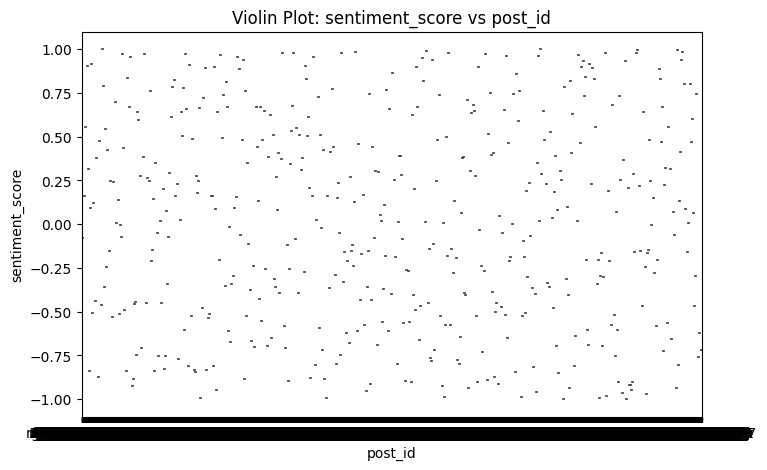

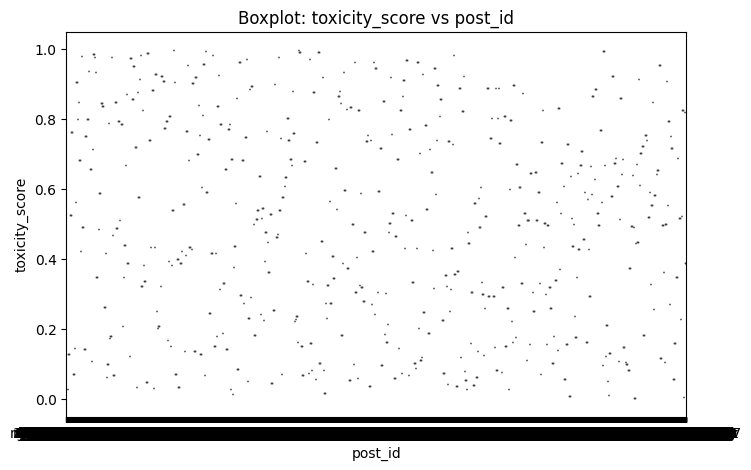

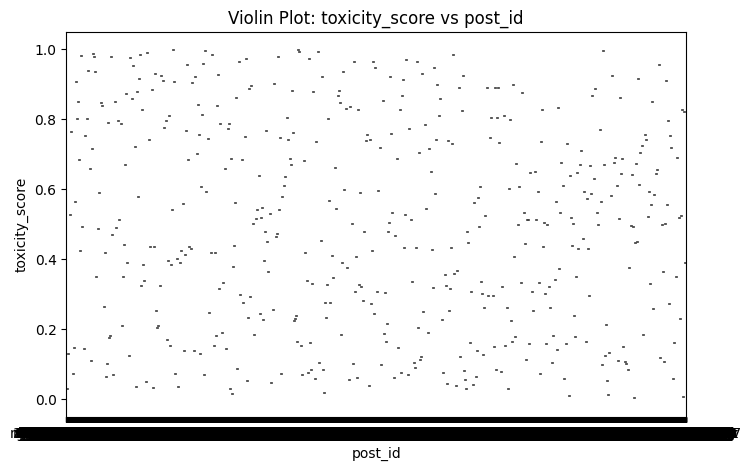

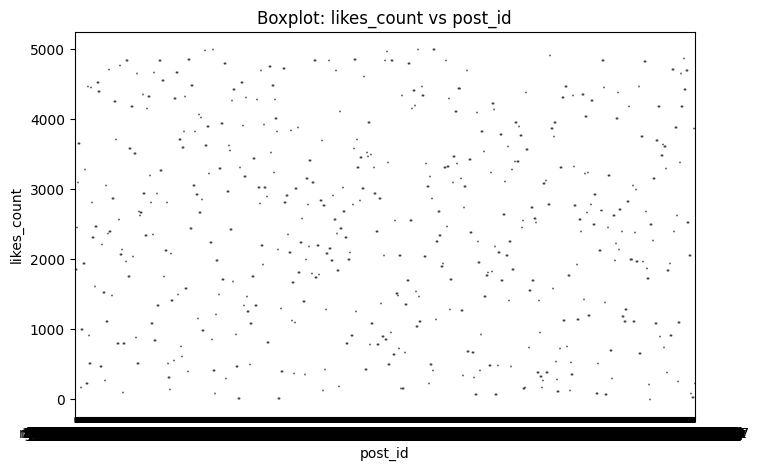

In [ ]:
# Identify categorical and numerical columns
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Example: For each categorical column vs a numerical column
for categorical in categorical:
    for numerical in numerical:
        # Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=categorical, y=numerical, data=df)
        plt.title(f'Boxplot: {numerical} vs {categorical}')
        plt.show()
        
        # Violin plot
        plt.figure(figsize=(8,5))
        sns.violinplot(x=categorical, y=numerical, data=df)
        plt.title(f'Violin Plot: {numerical} vs {categorical}')
        plt.show()



In [ ]:
# For each pair of categorical columns
for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cat1 = categorical[i]
        cat2 = categorical[j]
        
        print(f"🔸 Crosstab of {cat1} vs {cat2}")
        ctab = pd.crosstab(df[cat1], df[cat2])
        print(ctab)
        print("-"*50)
        
        # Stacked bar plot
        ctab.plot(kind='bar', stacked=True, figsize=(8,6))
        plt.title(f'Stacked Bar Plot: {cat1} vs {cat2}')
        plt.xlabel(cat1)
        plt.ylabel('Count')
        plt.legend(title=cat2)
        plt.show()
